In this problem, we classify ecg signals from two people. ‘rec_1.csv’ is from person one, and ‘rec_5.csv’ is from person two. These two files have the same format, each contains 360 measurements per second from 2 sensors. The measurements for these 2 sensors are labeled x1 and x2. There are 10,000 measurements in total. Therefore, the number of rows in each file is 10,000. The first 8,000 rows of data are used for training and the rest are used for testing. We train and test our classifier using 1-second segments of the ecg signals. We use both Conv1D and LSTM models and compare their performances.

In [ ]:
import numpy as np
import pandas as pd
get_ipython().magic('matplotlib inline')
import seaborn; seaborn.set()
import matplotlib.pyplot as plt
from tensorflow import keras


from os import listdir
from os.path import isfile, join
mypath = './'

In [ ]:
fname ='rec_1.csv'
file = mypath + fname
data = pd.read_csv(file, header=None)
data = data.dropna()
data.columns = ['tick', 'x1', 'x2']

In [ ]:
data.head()

,tick,x1,x2
0,0.0,-0.085,-0.115
1,1.0,-0.080,-0.115
2,2.0,-0.070,-0.120
3,3.0,-0.075,-0.120
4,4.0,-0.095,-0.120


In [ ]:
data.describe()

,tick,x1,x2
count,10000.000000,10000.000000,10000.000000
mean,249.500000,-0.024002,0.001002
std,144.344496,0.129358,0.116432
min,0.000000,-0.330000,-0.235000
25%,124.750000,-0.110000,-0.070000
50%,249.500000,-0.055000,-0.035000
75%,374.250000,0.025000,0.040000
max,499.000000,0.890000,0.795000


In [ ]:
fname ='rec_5.csv'
file = mypath + fname
data1 = pd.read_csv(file, header=None)
data1 = data1.dropna()
data1.columns = ['tick', 'x1', 'x2']
data1.head()

,tick,x1,x2
0,0.0,0.135,0.065
1,1.0,0.060,-0.095
2,2.0,-0.085,-0.190
3,3.0,-0.235,-0.250
4,4.0,-0.335,-0.250


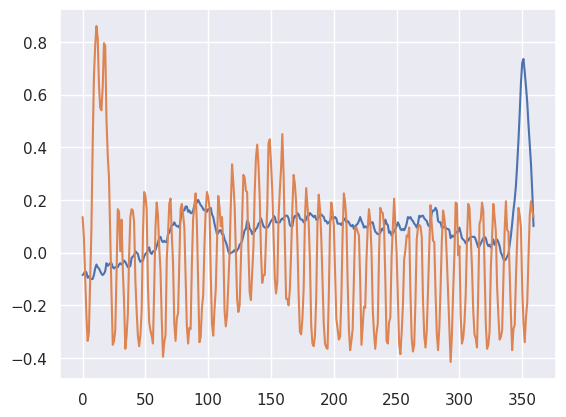

In [ ]:
plt.plot(data.x1[:360]);
plt.plot(data1.x1[:360]);

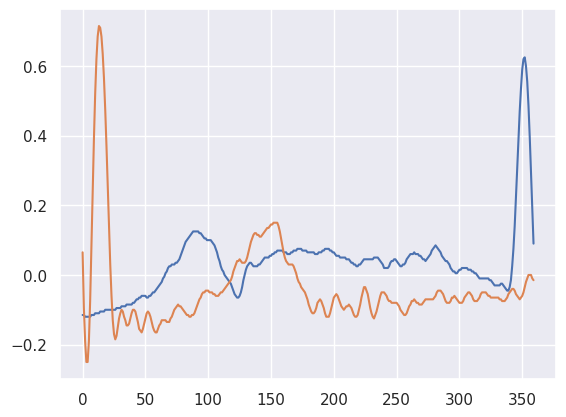

In [ ]:
plt.plot(data.x2[:360]);
plt.plot(data1.x2[:360]);

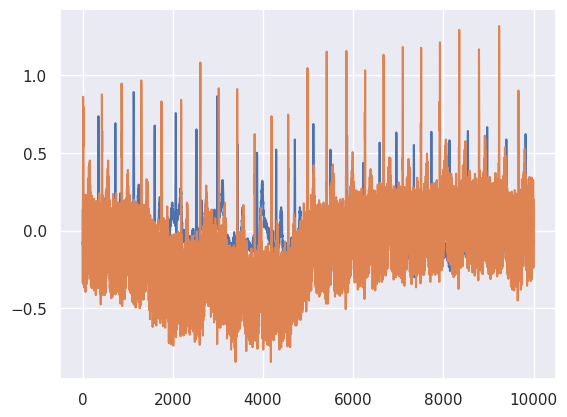

In [ ]:
plt.plot(data.x1);
plt.plot(data1.x1);

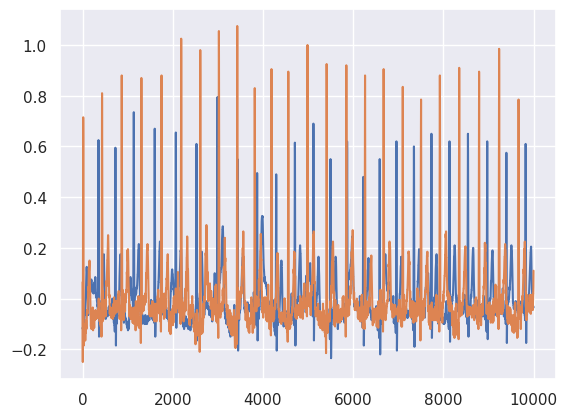

In [ ]:
plt.plot(data.x2);
plt.plot(data1.x2);

In [ ]:
float_data = np.array(data)

In [ ]:
float_data = float_data[:, 1:]

In [ ]:
float_data.shape

(10000, 2)

In [ ]:
float_data1 = np.array(data1)
float_data1 = float_data1[:, 1:]
float_data1.shape

(10000, 2)

In [ ]:
freq = 360
def sample(n, duration, data):
    samples = []
    for i in range(n):
        rand = np.random.randint(data.shape[0] - freq*duration)
        samples.append(data[rand: rand+freq*duration, :])
    return np.array(samples)

In [ ]:
x_train = sample(2000, 1, float_data[:8000])

In [ ]:
x_train.shape

(2000, 360, 2)

In [ ]:
y_train = np.zeros(x_train.shape[0])

In [ ]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
x_train1 = sample(2000, 1, float_data1[:8000])

In [ ]:
y_train1 = np.ones(x_train1.shape[0])

In [ ]:
y_train1

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
x_train = np.concatenate((x_train, x_train1), axis=0)

In [ ]:
x_train.shape

(4000, 360, 2)

In [ ]:
y_train = np.concatenate((y_train, y_train1), axis=0)

In [ ]:
y_train.shape

(4000,)

In [ ]:
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

In [ ]:
x_test = sample(2000, 1, float_data[8000:])
y_test = np.zeros(x_test.shape[0])
x_test1 = sample(2000, 1, float_data1[8000:])
y_test1 = np.ones(x_test1.shape[0])
x_test = np.concatenate((x_test, x_test1), axis=0)
y_test = np.concatenate((y_test, y_test1), axis=0)

In [ ]:
x_test.shape

(4000, 360, 2)

In [ ]:
y_test.shape

(4000,)

In [ ]:
y_test[:2000], y_test[2000:]

(array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]))

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv1D(32, 5, activation='relu', input_shape=(360, 2)))
model.add(layers.MaxPooling1D())
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense( , activation= ))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 356, 32)           352       
                                                                 
 max_pooling1d (MaxPooling1  (None, 178, 32)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 174, 32)           5152      
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 512)               16896     
                                                                 
 dense_1 (Dense)             (None, 1)                 5

In [ ]:
from keras import optimizers

model.compile(loss='',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, shuffle=True,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
100/100 [==============================] - 10s 6ms/step - loss: 0.6592 - acc: 0.4994 - val_loss: 0.6234 - val_acc: 0.5063
Epoch 2/10
100/100 [==============================] - 0s 4ms/step - loss: 0.5732 - acc: 0.6647 - val_loss: 0.5085 - val_acc: 0.9925
Epoch 3/10
100/100 [==============================] - 0s 4ms/step - loss: 0.4307 - acc: 0.9981 - val_loss: 0.3457 - val_acc: 1.0000
Epoch 4/10
100/100 [==============================] - 0s 4ms/step - loss: 0.2615 - acc: 1.0000 - val_loss: 0.1795 - val_acc: 1.0000
Epoch 5/10
100/100 [==============================] - 0s 4ms/step - loss: 0.1152 - acc: 1.0000 - val_loss: 0.0655 - val_acc: 1.0000
Epoch 6/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0371 - acc: 1.0000 - val_loss: 0.0189 - val_acc: 1.0000
Epoch 7/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0104 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 1.0000
Epoch 8/10
100/100 [==============================] - 0s 4ms/step - loss: 0

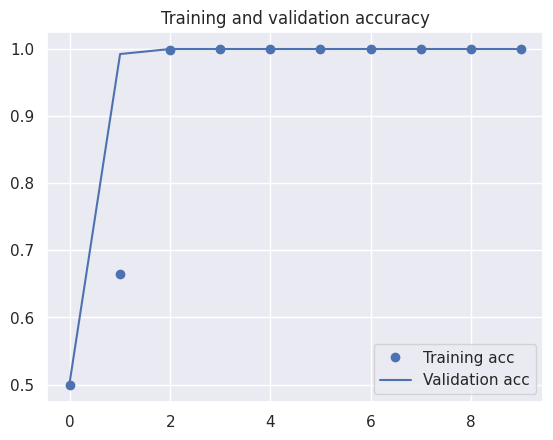

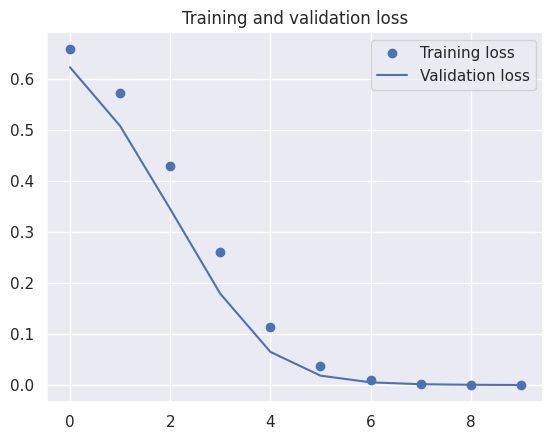

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

125/125 [==============================] - 0s 2ms/step - loss: 0.0012 - acc: 1.0000


In [ ]:
test_acc

1.0

In [ ]:
import keras.models
keras.models.save_model(model, 'ecg_Conv1D.h5')

<ipython-input-38-32b512318553>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  keras.models.save_model(model, 'ecg_Conv1D.h5')


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.LSTM(32, input_shape=( ,  )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense( , activation= ))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4480      
                                                                 
 dense_2 (Dense)             (None, 512)               16896     
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 21889 (85.50 KB)
Trainable params: 21889 (85.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras import optimizers

model.compile(loss='',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])
history = model.fit(x_train, y_train, shuffle=True,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
100/100 [==============================] - 4s 16ms/step - loss: 0.6832 - acc: 0.6203 - val_loss: 0.6736 - val_acc: 0.6212
Epoch 2/10
100/100 [==============================] - 1s 12ms/step - loss: 0.6588 - acc: 0.6356 - val_loss: 0.6387 - val_acc: 0.6325
Epoch 3/10
100/100 [==============================] - 1s 12ms/step - loss: 0.5895 - acc: 0.6750 - val_loss: 0.5241 - val_acc: 0.7113
Epoch 4/10
100/100 [==============================] - 1s 12ms/step - loss: 0.4936 - acc: 0.7484 - val_loss: 0.4756 - val_acc: 0.7600
Epoch 5/10
100/100 [==============================] - 1s 12ms/step - loss: 0.4769 - acc: 0.7569 - val_loss: 0.5057 - val_acc: 0.7500
Epoch 6/10
100/100 [==============================] - 1s 12ms/step - loss: 0.4940 - acc: 0.7544 - val_loss: 0.4694 - val_acc: 0.7613
Epoch 7/10
100/100 [==============================] - 1s 12ms/step - loss: 0.4875 - acc: 0.7581 - val_loss: 0.4702 - val_acc: 0.7600
Epoch 8/10
100/100 [==============================] - 1s 12ms/step - 

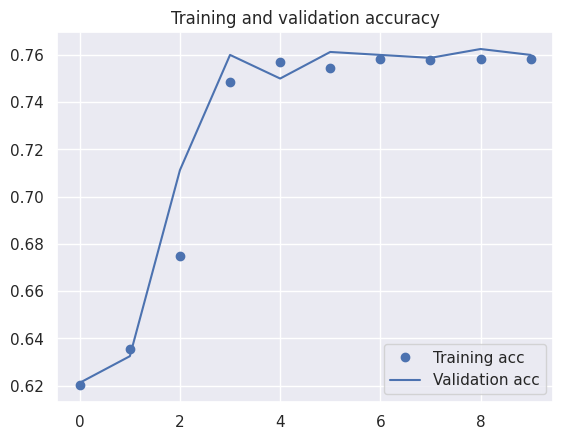

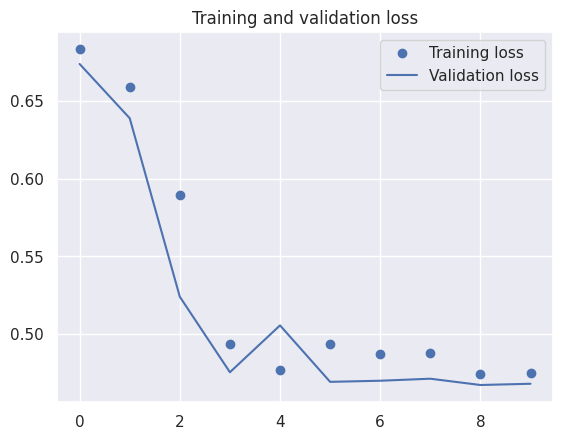

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

125/125 [==============================] - 1s 5ms/step - loss: 0.8219 - acc: 0.4895


In [ ]:
test_acc

0.4894999861717224

In [ ]:
import keras.models
keras.models.save_model(model, 'ecg_LSTM.h5')

<ipython-input-45-2eddbb0355c1>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  keras.models.save_model(model, 'ecg_LSTM.h5')
